In [3]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [4]:
from testmining.loader import read_dump
from IPython.display import display
import altair as alt

In [5]:
data = read_dump('../travistorrent_8_2_2017.csv')
data.head()

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,...,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
0,106060,rails/rails,False,NaT,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,106060,rails/rails,False,NaT,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,106060,rails/rails,False,NaT,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,106060,rails/rails,False,NaT,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,106060,rails/rails,False,NaT,NaN,ruby,NaN,3-1-stable,NaN,NaN,...,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [4]:
# How many builds are there?
display("%d jobs" % len(data['tr_job_id'].unique())) # Learning: job ID is key, build ID is not
display("%d builds" % len(data['tr_build_id'].unique()))
display("%d projects" % len(data['gh_project_name'].unique()))

'3702595 jobs'

'680209 builds'

'1283 projects'

In [5]:
from testmining.projects import project_names
project_names(data).head(5)

,gh_project_name
0,rails/rails
1,intridea/omniauth
2,myronmarston/vcr
3,concerto/concerto
4,sferik/sign-in-with-twitter


In [6]:
from testmining.projects import project_statistics
projects = project_statistics(data)

In [7]:
# Which project has the most test failures in a job?
projects.sort_values(by='max_test_failures', ascending=False).head(5)[['max_test_failures']]

,max_test_failures
gh_project_name,
rails/rails,3678.0
puppetlabs/puppet,2699.0
neo4jrb/neo4j,2512.0
owlcs/owlapi,2037.0
RolifyCommunity/rolify,1878.0


In [8]:
# Which project has the most jobs with test failures?
projects.sort_values(by='test_failures', ascending=False).head(5)[['test_failures']]

,test_failures
gh_project_name,
rails/rails,52826.0
spree/spree,6631.0
diaspora/diaspora,5218.0
pat/thinking-sphinx,4703.0
celluloid/celluloid,3901.0


In [9]:
# What share of jobs failed?
projects.sort_values(by='relative_failed_jobs', ascending=False).head(5)[['relative_failed_jobs']]

,relative_failed_jobs
gh_project_name,
rspec/rspec-collection_matchers,0.013229
eclipse/jetty.project,0.011781
coorasse/Airesis,0.010164
weld/core,0.009708
kuujo/copycat,0.009021


/Users/falco/.local/share/virtualenvs/testmining-L_g6SVF2/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


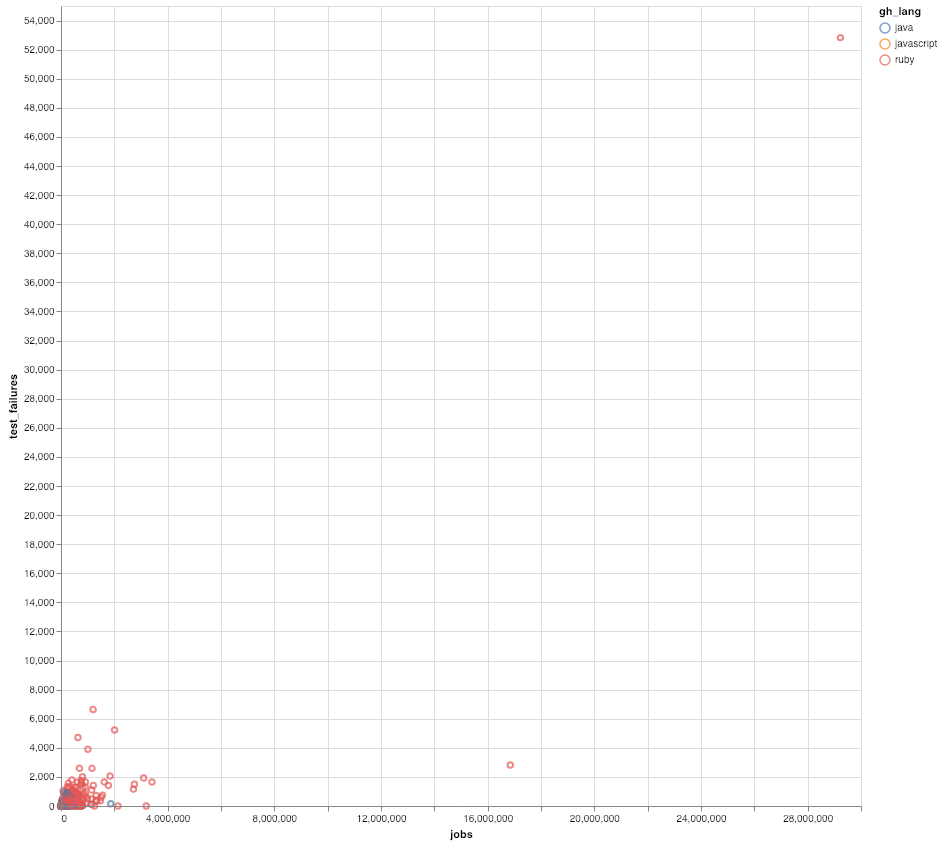

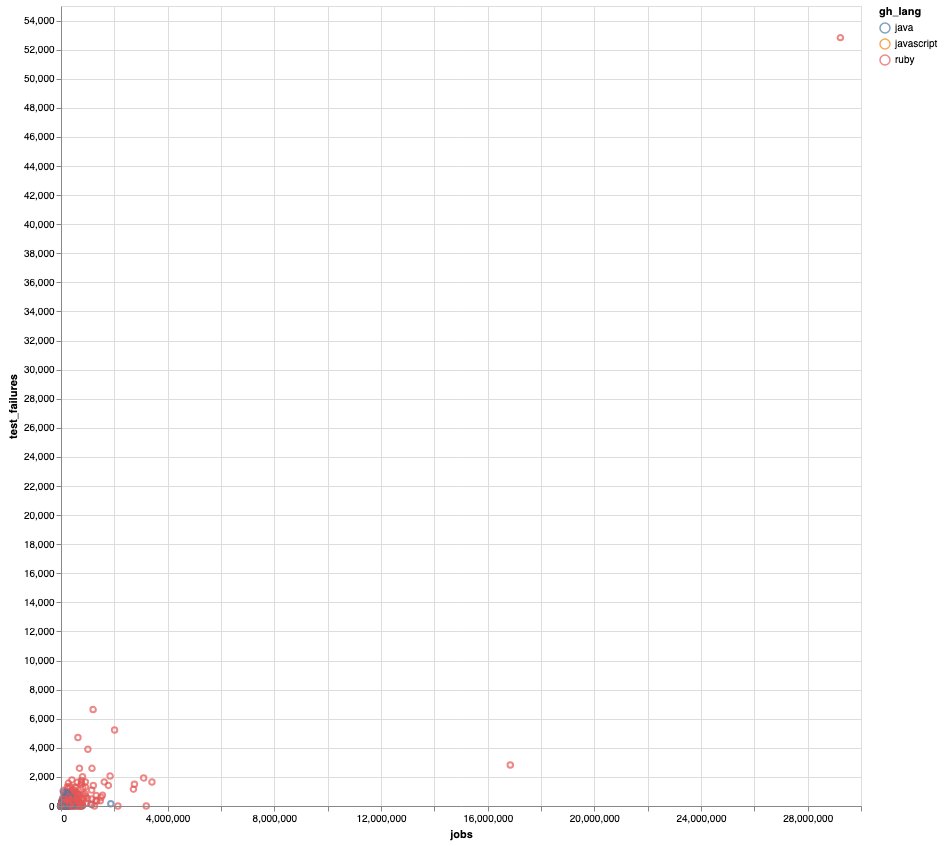

In [10]:
# Are there outliers w.r.t. to build count and test failures?
# Are there projects with many builds but very few test failures?
nearest = alt.selection(type='single',
                        nearest=True,
                        on='mouseover',
                        fields=['jobs', 'test_failures'],
                        empty='none')

points = alt.Chart().mark_point().encode(x='jobs',
                                         y='test_failures',
                                         color='gh_lang')

condition_project_names = alt.condition(nearest, 'gh_project_name', alt.value(''))
text = points.mark_text().encode(text=condition_project_names).add_selection(nearest)
alt.layer(points, text, data=projects.reset_index(), width=800, height=800)

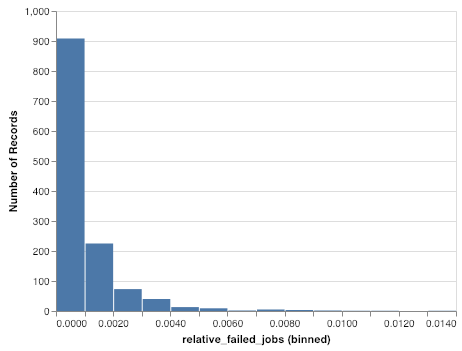

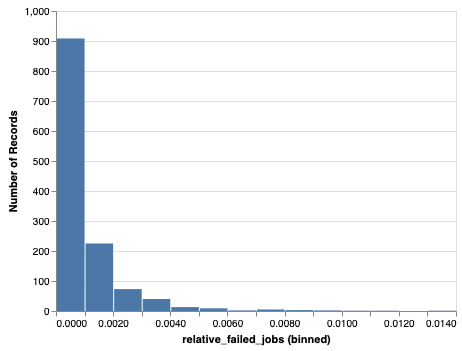

In [11]:
alt.Chart(projects).mark_bar().encode(
    x=alt.X('relative_failed_jobs', bin=alt.BinParams(step=0.001)),
    y='count()'
)

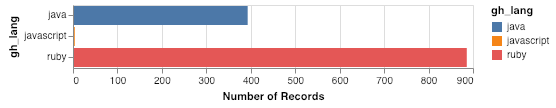

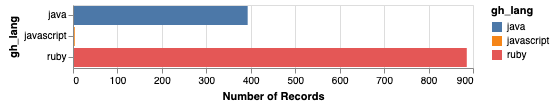

In [12]:
alt.Chart(projects).mark_bar().encode(
    x='count()',
    y='gh_lang',
    color='gh_lang'
)

In [13]:
data[(data.gh_project_name == 'google/guava') & (data.tr_log_bool_tests_ran) & (data.tr_log_bool_tests_failed)]

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,gh_commits_in_push,...,tr_log_bool_tests_ran,tr_log_bool_tests_failed,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_run,tr_log_num_tests_skipped,tr_log_tests_failed,tr_log_testduration,tr_log_buildduration,build_successful
3593944,144632195,google/guava,False,NaT,NaN,java,NaN,master,NaN,NaN,...,True,1.0,733677.0,65.0,733742.0,0.0,testToArray_emptyArrayOfWrongTypeForNonEmptyCo...,687.07,707.0,False
3630814,148395413,google/guava,False,NaT,NaN,java,NaN,master,NaN,NaN,...,True,1.0,733687.0,65.0,733752.0,0.0,testToArray_emptyArrayOfWrongTypeForNonEmptyCo...,731.76,756.0,False
3686205,154544197,google/guava,False,NaT,NaN,java,NaN,master,NaN,NaN,...,True,1.0,733690.0,65.0,733755.0,0.0,testToArray_emptyArrayOfWrongTypeForNonEmptyCo...,790.08,814.0,False


In [17]:
import pandas as pd
from IPython.display import display

with pd.option_context("display.max_rows", -1):
    data[data.gh_lang == 'java'].groupby('gh_project_name').agg({'tr_log_num_tests_failed': 'sum'}).sort_values(by='tr_log_num_tests_failed', ascending=False).to_csv('../output/prospects.csv')

In [6]:
data[data.gh_lang == 'ruby'].groupby('gh_project_name').agg({'tr_log_num_tests_failed': 'sum'}).sort_values(by='tr_log_num_tests_failed', ascending=False).to_csv('../output/prospects-ruby.csv')

In [10]:
data[data.tr_build_id == 21297109]['tr_build_number']

1206773    5
1206774    5
Name: tr_build_number, dtype: int64

In [ ]:
data[data.gh_project_name == "facebook/buck"]

In [ ]:

import pandas as pd

def build_number_check(project_group):
    diff = project_group['tr_build_number'].diff()
    valid = (diff[1:] >= 0).all()
    if not valid:
        group = project_group[['tr_job_id', 'tr_build_number']]
        group['diff'] = diff
        return pd.DataFrame(group[diff < 0])
    return pd.DataFrame()

data.sort_values(by='tr_job_id').groupby('gh_project_name').apply(build_number_check)